In [84]:
# importar os pacotes necessários
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [85]:
df_estados = pd.read_csv('data/estados.csv')
df_municipios = pd.read_csv('data/casos_municipios.csv', encoding='latin_1')

In [88]:
df =  pd.merge(df_estados, df_municipios, on='codigo_uf')

In [89]:
df.head()

,codigo_uf,uf,nome_x,codigo_ibge,nome_y,Casos,capital,latitude,longitude
0,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,0,-11.92830,-61.9953
1,11,RO,Rondônia,1100379,Alto Alegre dos Parecis,NaN,0,-12.13200,-61.8350
2,11,RO,Rondônia,1100403,Alto Paraíso,NaN,0,-9.71429,-63.3188
3,11,RO,Rondônia,1100346,Alvorada D'Oeste,NaN,0,-11.34630,-62.2847
4,11,RO,Rondônia,1100023,Ariquemes,NaN,0,-9.90571,-63.0325


In [90]:
df.rename(columns={'nome_x': 'estado', 'nome_y':'municipio', 'Casos': 'casos'}, inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


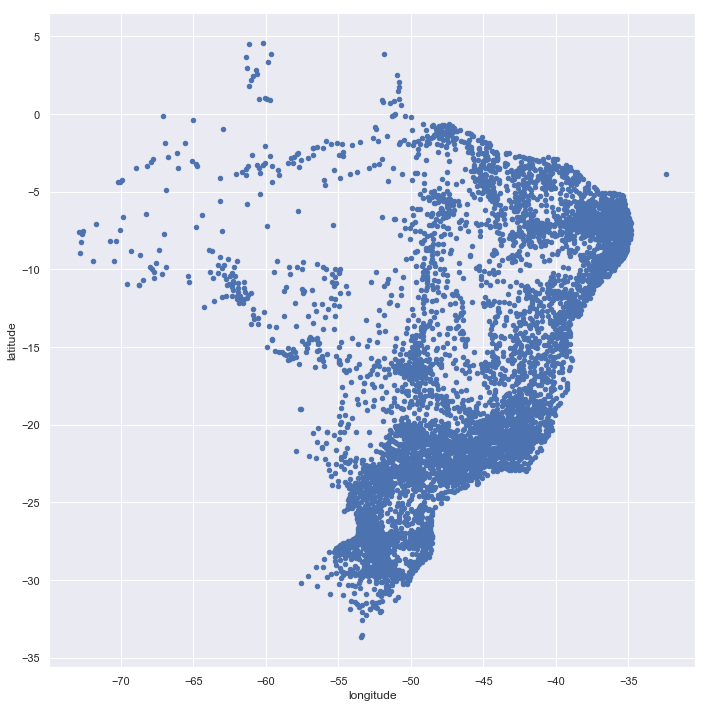

In [92]:
#Verificando o dataframe importado 
fig, ax = plt.subplots(figsize=(10,10))

df.plot.scatter(x='longitude', y='latitude', ax=ax)
plt.tight_layout()

In [94]:
df_rs = df[ (df['uf'] == 'RS') ]

In [12]:
df_rs = df[ (df['uf'] == 'RS') &  df['casos'].notna() ]

In [75]:
import seaborn as sns
sns.set()

In [281]:
# importar dataset para tratar os dados localmente
df_rs_tratado = pd.read_excel('casos_rs.xlsx')

In [283]:
df_rs_tratado.head()


,codigo_ibge,data
0,4300604,2020-03-19
1,4300604,2020-03-21
2,4300703,2020-03-24
3,4301602,2020-03-19
4,4301602,2020-03-19


In [280]:
df_rs_tratado.set_index('data', inplace=True)

In [282]:
df_rs_tratado.rename(columns={'ibge': 'codigo_ibge'}, inplace=True)

In [284]:
df_rs_tratado = pd.merge(df, df_rs_tratado, on='codigo_ibge')


In [293]:
df_rs_tratado.head()

,codigo_uf,uf,estado,codigo_ibge,municipio,casos,capital,latitude,longitude,data
0,43,RS,Rio Grande do Sul,4300604,Alvorada,2.0,0,-29.9914,-51.0809,2020-03-19
1,43,RS,Rio Grande do Sul,4300604,Alvorada,2.0,0,-29.9914,-51.0809,2020-03-21
2,43,RS,Rio Grande do Sul,4300703,Anta Gorda,NaN,0,-28.9698,-52.0102,2020-03-24
3,43,RS,Rio Grande do Sul,4301602,Bagé,7.0,0,-31.3297,-54.0999,2020-03-19
4,43,RS,Rio Grande do Sul,4301602,Bagé,7.0,0,-31.3297,-54.0999,2020-03-19


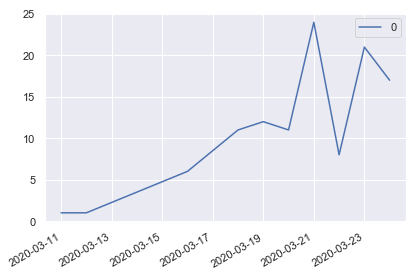

In [290]:
# Casos por dia
fig, ax = plt.subplots()

pd.DataFrame.from_dict(group, orient='index').plot(kind='line', ax=ax)
ax.set_title = 'Casos por Dia'
ax.set_ylabel = 'Casos confirmados'
ax.set_xlabel = 'Data'
plt.tight_layout()


In [335]:
# Casos por Município
municipios = pd.DataFrame.from_dict(df_rs_tratado.groupby('municipio').size())
#municipios = municipios.sort_values(by=[1], ascending=False)
municipios.rename(columns={0: 'qtde'}, inplace=True)
municipios = municipios.sort_values(by=['qtde'], ascending=False)

municipios.head()

fig, ax = plt.subplots(figsize=(12,6))
municipios.plot(kind='bar', ax=ax)
ax.set_title = 'Casos por Município'
ax.set_ylabel = 'Casos'
ax.set_xlabel = 'Município'
plt.tight_layout()


,qtde
municipio,
Porto Alegre,47
Bagé,7
Canoas,6
Lajeado,5
Torres,4


In [364]:
# criando um mapa
mapa = folium.Map(location=[-30.772524, -53.240623],
                  zoom_start=6.45,  
                 )

#adicionado os marcadores no mapa
for lat, lon, mun in zip(df_rs_tratado.latitude.values, df_rs_tratado.longitude.values, df_rs_tratado.municipio.values):
  folium.Marker(location=[float(lat), float(lon)], tooltip=mun).add_to(mapa)
mapa

In [361]:


# Casos por Município
df_mapa_bolha = pd.DataFrame.from_dict(df_rs_tratado.groupby('codigo_ibge').size())
df_mapa_bolha = pd.merge(df_mapa_bolha, df_municipios, on='codigo_ibge')
df_mapa_bolha.rename(columns={0: 'qtde'}, inplace=True)
df_mapa_bolha.head(2)


,codigo_ibge,qtde,nome,Casos,capital,codigo_uf,latitude,longitude
0,4300604,2,Alvorada,2.0,0,43,-29.9914,-51.0809
1,4300703,1,Anta Gorda,NaN,0,43,-28.9698,-52.0102


In [363]:
# criando um mapa
mapa = folium.Map(location=[-30.772524, -53.240623],
                  zoom_start=6.45,  
                 )

#adicionado os marcadores no mapa
for lat, lon, mun, cas in zip(df_mapa_bolha.latitude.values, df_mapa_bolha.longitude.values, df_mapa_bolha.nome.values, df_mapa_bolha.qtde):
  folium.CircleMarker(
    location=[float(lat), float(lon)],
    radius=cas*1.5,
    popup= mun + ': ' + str(int(cas)) + ' casos',
    color='#FE3939',
    fill=True,
    fill_color='#FE8484'
  ).add_to(mapa)

mapa